<a href="https://colab.research.google.com/github/Abishek-077/AI-l-ML---PROJECTS/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/netflix_data.csv')

# Show the first few rows
data.head()


,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y


In [ ]:
# Basic Info
print(data.info())

# Check missing values
print(data.isnull().sum())

# Clean "Suggested to Friends/Family" to extract percentage and "Yes/No"
data['Suggested_Percentage'] = data['Suggested to Friends/Family (Y/N %)'].str.extract(r'(\d+)%').astype(float)
data['Suggested_YN'] = data['Suggested to Friends/Family (Y/N %)'].str.extract(r'([YN])')

# Clean Minute of Life-Changing Insight into minutes (optional, a bit harder)
# First, split by ":" to separate minutes and seconds
data[['Minute', 'Second']] = data['Minute of Life-Changing Insight'].str.extract(r'(\d+):(\d+)')
data['Minute'] = pd.to_numeric(data['Minute'])
data['Second'] = pd.to_numeric(data['Second'])
data['Total_Seconds'] = data['Minute'] * 60 + data['Second']

# Drop unnecessary columns (optional)
# data = data.drop(['Minute of Life-Changing Insight', 'Suggested to Friends/Family (Y/N %)'], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie Title                          82 non-null     object 
 1   Genre                                82 non-null     object 
 2   Release Year                         82 non-null     int64  
 3   Average Rating                       82 non-null     float64
 4   Number of Reviews                    82 non-null     int64  
 5   Review Highlights                    82 non-null     object 
 6   Minute of Life-Changing Insight      82 non-null     object 
 7   How Discovered                       82 non-null     object 
 8   Meaningful Advice Taken              82 non-null     object 
 9   Suggested to Friends/Family (Y/N %)  82 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 6.5+ KB
None
Movie Title                           

<ipython-input-20-48937d4f4fdd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating', y='Movie Title', data=data, palette='viridis')


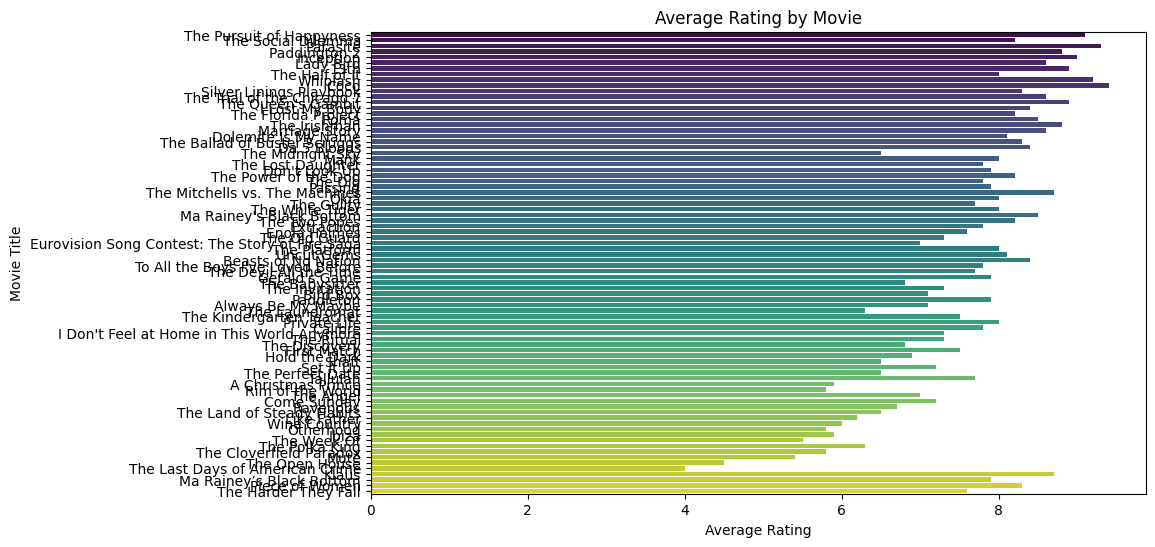

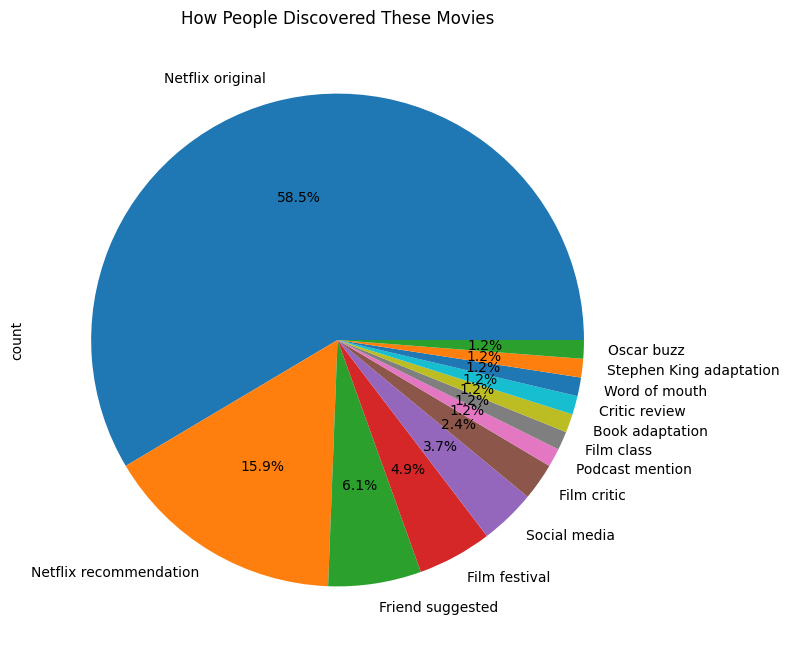

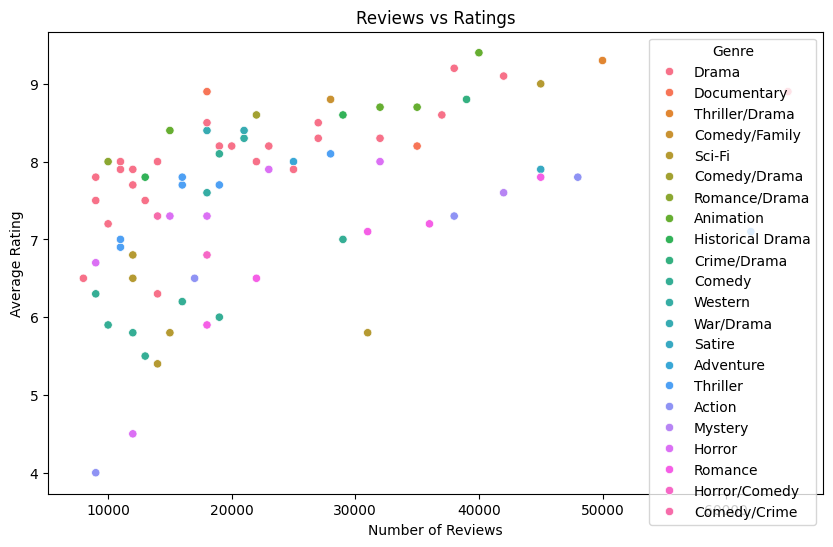

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Average Rating', y='Movie Title', data=data, palette='viridis')
plt.title('Average Rating by Movie')
plt.show()

# Pie chart: How discovered
plt.figure(figsize=(8,8))
data['How Discovered'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('How People Discovered These Movies')
plt.show()

# Scatter plot: Number of Reviews vs Average Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Number of Reviews', y='Average Rating', hue='Genre', data=data)
plt.title('Reviews vs Ratings')
plt.show()

In [ ]:
# Average rating per genre
print(data.groupby('Genre')['Average Rating'].mean())

# Correlation
print(data[['Number of Reviews', 'Average Rating']].corr())

# Average Suggestion Rate by Discovery Method
print(data.groupby('How Discovered')['Suggested_Percentage'].mean())


Genre
Action              6.400000
Adventure           8.000000
Animation           8.800000
Comedy              6.350000
Comedy/Crime        7.300000
Comedy/Drama        8.600000
Comedy/Family       8.800000
Crime/Drama         8.800000
Documentary         8.550000
Drama               8.008333
Historical Drama    8.200000
Horror              6.950000
Horror/Comedy       6.800000
Mystery             7.600000
Romance             6.900000
Romance/Drama       8.000000
Satire              7.900000
Sci-Fi              6.550000
Thriller            7.471429
Thriller/Drama      9.300000
War/Drama           8.400000
Western             7.950000
Name: Average Rating, dtype: float64
                   Number of Reviews  Average Rating
Number of Reviews            1.00000         0.47688
Average Rating               0.47688         1.00000
How Discovered
Book adaptation            81.000000
Critic review              73.000000
Film class                 82.000000
Film critic                73.0000

In [ ]:
# Create binary target: 1 = suggested >85%, 0 = suggested <=85%
data['High_Suggested'] = (data['Suggested_Percentage'] > 85).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select features
X = data[['Average Rating', 'Number of Reviews', 'Minute', 'Second']]
y = data['High_Suggested']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

Accuracy: 0.8
